In [2]:
import pandas as pd
import numpy as np

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# Do a test train split
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Test train split
# from sklearn.model_selection import train_test_split
# X_train, y_train, X_test, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [5]:
# Build a Neural Network model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [20]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Batch Gradient Descent (BGD)
history = model.fit(X_scaled, y, batch_size=X_scaled.shape[0], epochs=50, verbose=1, validation_split=0.2)
# # Mini Batch Gradient Descent (MBGD)
# history = model.fit(X_scaled, y, batch_size=32, epochs=50, verbose=1, validation_split=0.2)
# # Stochastic Gradient Descent (SGD)
# history = model.fit(X_scaled, y, batch_size=1, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 1s 869ms/step - loss: 0.1724 - accuracy: 0.9281 - val_loss: 0.2666 - val_accuracy: 0.8875
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 0.1724 - accuracy: 0.9281 - val_loss: 0.2669 - val_accuracy: 0.9000
Epoch 3/50
1/1 [==============================] - 0s 26ms/step - loss: 0.1721 - accuracy: 0.9281 - val_loss: 0.2700 - val_accuracy: 0.8875
Epoch 4/50
1/1 [==============================] - 0s 28ms/step - loss: 0.1715 - accuracy: 0.9312 - val_loss: 0.2746 - val_accuracy: 0.8875
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 0.1711 - accuracy: 0.9344 - val_loss: 0.2689 - val_accuracy: 0.8875
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 0.1708 - accuracy: 0.9312 - val_loss: 0.2695 - val_accuracy: 0.8875
Epoch 7/50
1/1 [==============================] - 0s 35ms/step - loss: 0.1705 - accuracy: 0.9344 - val_loss: 0.2721 - val_accuracy: 0.8875
Epoch 8/50
1/1 [==========

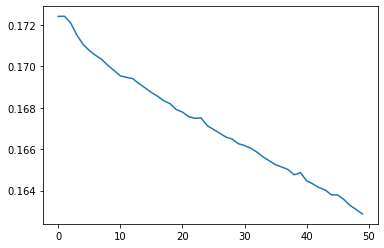

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])